In [162]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from torch.utils.data import Subset
import math
import numpy as np

In [163]:
df = pd.read_csv('BMED_DATA_AG.csv')
df = df[df['exp'].isin([0, 1])]
df

exp   V     E     t        VF        VA        VB      CFLA      CALA  \
0     0  20  0.25  0.00  1.000000  1.000000  1.000000  0.495147  0.000518   
1     0  20  0.25  0.25  1.008596  0.997544  0.993860  0.490314  0.001626   
2     0  20  0.25  0.50  1.016095  0.995401  0.988503  0.485344  0.003696   
3     0  20  0.25  0.75  1.021399  0.993886  0.984715  0.480242  0.006447   
4     0  20  0.25  1.00  1.023411  0.993311  0.983278  0.475013  0.009596   
5     0  20  0.25  1.25  1.023411  0.993311  0.983278  0.469945  0.013449   
6     0  20  0.25  1.50  1.023411  0.993311  0.983278  0.464930  0.018532   
7     0  20  0.25  1.75  1.023411  0.993311  0.983278  0.459382  0.024891   
8     0  20  0.25  2.00  1.023411  0.993311  0.983278  0.452711  0.032573   
9     0  20  0.25  2.25  1.019035  0.994249  0.986841  0.444537  0.043127   
10    0  20  0.25  2.50  1.008397  0.996649  0.995287  0.434633  0.057472   
11    0  20  0.25  2.75  0.995233  0.999888  1.005254  0.422646  0.074713   
12    0  20  0.25  3.00  0.983278  1.003344  1.013378  0.408224  0.093954   
13    0  20  0.25  3.25  0.973154  1.007213  1.019257  0.389029  0.116397   
14    0  20  0.25  3.50  0.962995  1.011995  1.024676  0.363790  0.143351   
15    0  20  0.25  3.75  0.952799  1.017528  1.029548  0.333748  0.174079   
16    0  20  0.25  4.00  0.942568  1.023649  1.033784  0.300146  0.207842   
17    1  30  0.25  0.00  1.000000  1.000000  1.000000  0.504280  0.000005   
18    1  30  0.25  0.25  1.001934  1.000261  0.996363  0.502670  0.001425   
19    1  30  0.25  0.50  1.002926  1.000975  0.994352  0.498322  0.005319   
20    1  30  0.25  0.75  1.003292  1.002037  0.993492  0.491954  0.011134   
21    1  30  0.25  1.00  1.003344  1.003344  0.993311  0.484286  0.018318   
22    1  30  0.25  1.25  1.000304  1.005666  0.994815  0.471909  0.032020   
23    1  30  0.25  1.50  0.992433  1.009546  0.998722  0.452345  0.055142   
24    1  30  0.25  1.75  0.981606  1.014539  1.004120  0.427720  0.083760   
25    1  30  0.25  2.00  0.969697  1.020202  1.010101  0.400155  0.113953   
26    1  30  0.25  2.25  0.954308  1.028587  1.017246  0.361292  0.150764   
27    1  30  0.25  2.50  0.932957  1.040988  1.026548  0.305828  0.198685   
28    1  30  0.25  2.75  0.907397  1.055822  1.037712  0.240472  0.252969   
29    1  30  0.25  3.00  0.879379  1.071507  1.050441  0.171936  0.308872   
30    1  30  0.25  3.25  0.850657  1.086460  1.064441  0.106930  0.361644   
31    1  30  0.25  3.50  0.822981  1.099100  1.079417  0.052164  0.406541   
32    1  30  0.25  3.75  0.798104  1.107845  1.095072  0.014350  0.438815   
33    1  30  0.25  4.00  0.777778  1.111111  1.111111  0.000196  0.453719   
34    1  30  0.25  4.25  0.761074  1.109423  1.128753  0.000118  0.458020   
35    1  30  0.25  4.50  0.745919  1.104477  1.148938  0.000058  0.461453   
36    1  30  0.25  4.75  0.732347  1.096452  1.170951  0.000019  0.463727   
37    1  30  0.25  5.00  0.720395  1.085526  1.194079  0.000005  0.464550   

         CFK       CBK         I  
0   1.083763  0.011514  0.000000  
1   0.954817  0.136444  0.120313  
2   0.841070  0.246838  0.229167  
3   0.749887  0.335982  0.323438  
4   0.688634  0.397163  0.400000  
5   0.652190  0.434763  0.459375  
6   0.625896  0.462243  0.508333  
7   0.602804  0.486498  0.553125  
8   0.575969  0.514426  0.600000  
9   0.543493  0.548140  0.653125  
10  0.508881  0.584059  0.708333  
11  0.473290  0.620543  0.759375  
12  0.437875  0.655949  0.800000  
13  0.402826  0.690026  0.832031  
14  0.367562  0.723607  0.860417  
15  0.332086  0.756682  0.883594  
16  0.296398  0.789238  0.900000  
17  1.018588  0.007420  0.000000  
18  0.898095  0.127679  0.209531  
19  0.788310  0.237427  0.412917  
20  0.691775  0.334245  0.609844  
21  0.611031  0.415714  0.800000  
22  0.545536  0.483924  1.014375  
23  0.489820  0.543554  1.243333  
24  0.439041  0.596067  1.425625  
25  0.388355  0.642927  1.500000  
26  0.331668  0.689064  1.444141  
27  0.268914  0.7368

In [164]:
def set_device():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if torch.cuda.is_available():
        print(f'Using device: {device}')
        print(f'GPU: {torch.cuda.get_device_name(0)}')
    else:
        print(f'Using device: {device}')

    return device

In [165]:
def norm_data(df):
    df = df
    ndf = pd.DataFrame()
    range_mm={
        'V': {'min':df['V'].min()*0.8, 'max': df['V'].max()*1.2},
        'E': {'min':df['E'].min()*0.8, 'max': df['E'].max()*1.2},
        'VF': {'min':df['VF'].min()*0.8, 'max': df['VF'].max()*1.2},
        'VA': {'min':df['VA'].min()*0.8, 'max': df['VA'].max()*1.2},
        'VB': {'min':df['VB'].min()*0.8, 'max': df['VB'].max()*1.2},
        'CFLA': {'min':0, 'max': df['CFLA'].max()*1.2},
        'CALA': {'min':0, 'max': df['CALA'].max()*1.2},
        'CFK': {'min':0, 'max': df['CFK'].max()*1.2},
        'CBK': {'min':0, 'max': df['CBK'].max()*1.2},
        'I': {'min':0, 'max': df['I'].max()*1.2},
    }

    ndf['exp'] = df['exp']; ndf['t'] = df['t']

    for col in ['V', 'E', 'VF', 'VA', 'VB', 'CFLA', 'CALA', 'CFK', 'CBK', 'I']:
        if col in range_mm:
            ndf[col] = (df[col] - range_mm[col]['min'])/(range_mm[col]['max'] - range_mm[col]['min'])
        else:
            ndf[col] = df[col]

    # Get the unique experiment numbers in order
    exp_num_list = sorted(ndf['exp'].unique())
    return ndf, exp_num_list

In [166]:
ndf, exp_num_list = norm_data(df)
ndf

exp     t    V    E        VF        VA        VB      CFLA      CALA  \
0     0  0.00  0.2  0.5  0.650044  0.381209  0.330167  0.818241  0.000929   
1     0  0.25  0.2  0.5  0.663233  0.376649  0.320666  0.810255  0.002916   
2     0  0.50  0.2  0.5  0.674738  0.372672  0.312378  0.802041  0.006631   
3     0  0.75  0.2  0.5  0.682876  0.369858  0.306516  0.793610  0.011565   
4     0  1.00  0.2  0.5  0.685963  0.368791  0.304292  0.784969  0.017214   
5     0  1.25  0.2  0.5  0.685963  0.368791  0.304292  0.776594  0.024125   
6     0  1.50  0.2  0.5  0.685963  0.368791  0.304292  0.768307  0.033243   
7     0  1.75  0.2  0.5  0.685963  0.368791  0.304292  0.759138  0.044651   
8     0  2.00  0.2  0.5  0.685963  0.368791  0.304292  0.748115  0.058432   
9     0  2.25  0.2  0.5  0.679249  0.370533  0.309805  0.734606  0.077364   
10    0  2.50  0.2  0.5  0.662927  0.374988  0.322875  0.718240  0.103097   
11    0  2.75  0.2  0.5  0.642729  0.381001  0.338297  0.698431  0.134024   
12    0  3.00  0.2  0.5  0.624387  0.387417  0.350867  0.674598  0.168539   
13    0  3.25  0.2  0.5  0.608856  0.394599  0.359965  0.642879  0.208799   
14    0  3.50  0.2  0.5  0.593268  0.403477  0.368350  0.601171  0.257151   
15    0  3.75  0.2  0.5  0.577625  0.413748  0.375887  0.551526  0.312271   
16    0  4.00  0.2  0.5  0.561927  0.425109  0.382442  0.495998  0.372838   
17    1  0.00  0.7  0.5  0.650044  0.381209  0.330167  0.833333  0.000009   
18    1  0.25  0.7  0.5  0.653010  0.381693  0.324540  0.830674  0.002557   
19    1  0.50  0.7  0.5  0.654534  0.383018  0.321428  0.823487  0.009541   
20    1  0.75  0.7  0.5  0.655095  0.384990  0.320098  0.812964  0.019972   
21    1  1.00  0.7  0.5  0.655175  0.387417  0.319817  0.800294  0.032859   
22    1  1.25  0.7  0.5  0.650511  0.391728  0.322145  0.779839  0.057439   
23    1  1.50  0.7  0.5  0.638434  0.398929  0.328189  0.747510  0.098916   
24    1  1.75  0.7  0.5  0.621822  0.408198  0.336543  0.706816  0.150253   
25    1  2.00  0.7  0.5  0.603551  0.418711  0.345797  0.661265  0.204415   
26    1  2.25  0.7  0.5  0.579940  0.434277  0.356853  0.597043  0.270447   
27    1  2.50  0.7  0.5  0.547182  0.457298  0.371246  0.505387  0.356410   
28    1  2.75  0.7  0.5  0.507966  0.484835  0.388520  0.397385  0.453789   
29    1  3.00  0.7  0.5  0.464980  0.513952  0.408216  0.284128  0.554069   
30    1  3.25  0.7  0.5  0.420912  0.541711  0.429879  0.176704  0.648736   
31    1  3.50  0.7  0.5  0.378450  0.565176  0.453051  0.086203  0.729274   
32    1  3.75  0.7  0.5  0.340282  0.581409  0.477275  0.023713  0.787168   
33    1  4.00  0.7  0.5  0.309096  0.587472  0.502093  0.000324  0.813904   
34    1  4.25  0.7  0.5  0.283468  0.584338  0.529392  0.000195  0.821619   
35    1  4.50  0.7  0.5  0.260216  0.575157  0.560624  0.000095  0.827778   
36    1  4.75  0.7  0.5  0.239393  0.560259  0.594686  0.000031  0.831857   
37    1  5.00  0.7  0.5  0.221055  0.539977  0.630472  0.000009  0.833333   

         CFK       CBK         I  
0   0.833333  0.010392  0.000000  
1   0.734184  0.123144  0.066840  
2   0.646721  0.222778  0.127315  
3   0.576608  0.303232  0.179688  
4   0.529509  0.358449  0.222222  
5   0.501486  0.392385  0.255208  
6   0.481268  0.417186  0.282407  
7   0.463512  0.439076  0.307292  
8   0.442878  0.464282  0.333333  
9   0.417906  0.494710  0.362847  
10  0.391292  0.527128  0.393519  
11  0.363925  0.560055  0.421875  
12  0.336694  0.592010  0.444444  
13  0.309743  0.622765  0.462240  
14  0.282628  0.653073  0.478009  
15  0.255349  0.682924  0.490885  
16  0.227908  0.712307  0.500000  
17  0.783219  0.006697  0.000000  
18  0.690569  0.115234  0.116406  
19  0.606152  0.214284  0.229398  
20  0.531923  0.301664  0.338802  
21  0.469838  0.375192  0.444444  
22  0.419477  0.436754  0.563542  
23  0.376635  0.490571  0.690741  
24  0.337590  0.537965  0.792014  
25  0.298616  0.580258  0.833333  
26  0.255028  0.621898  0.802300  
27  0.206775  0.6650

In [167]:
def seq_data(ndf):
    seq = []
    # CBLA, CAKÎßå Ï†úÍ±∞: ÌïôÏäµ Î∂àÏïàÏ†ïÏÑ± ÎïåÎ¨∏Ïóê
    # Ï†ÑÎ•ò(I)Îäî Ìè¨Ìï®: ground truthÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏° ÏÑ±Îä• ÎπÑÍµê
    feature_cols = ['V', 'E', 'VF', 'VA', 'VB', 'CFLA', 'CALA', 'CFK', 'CBK', 'I']
    
    for exp in ndf['exp'].unique():
        exp_data = ndf[ndf['exp'] == exp].sort_values(by='t')
        seq.append(exp_data[feature_cols].values)
    
    return seq
seq = seq_data(ndf)
seq

[array([[0.2       , 0.5       , 0.65004389, 0.38120861, 0.33016703,
         0.81824127, 0.00092947, 0.83333333, 0.01039189, 0.        ],
        [0.2       , 0.5       , 0.66323299, 0.37664916, 0.320666  ,
         0.81025459, 0.00291644, 0.73418361, 0.12314437, 0.06684028],
        [0.2       , 0.5       , 0.67473837, 0.37267177, 0.31237786,
         0.80204123, 0.00663068, 0.64672075, 0.22277762, 0.12731481],
        [0.2       , 0.5       , 0.68287633, 0.3698585 , 0.30651552,
         0.79360975, 0.01156541, 0.57660798, 0.30323232, 0.1796875 ],
        [0.2       , 0.5       , 0.68596314, 0.36879139, 0.30429187,
         0.78496874, 0.01721385, 0.52950855, 0.35844914, 0.22222222],
        [0.2       , 0.5       , 0.68596314, 0.36879139, 0.30429187,
         0.77659381, 0.02412545, 0.501486  , 0.39238478, 0.25520833],
        [0.2       , 0.5       , 0.68596314, 0.36879139, 0.30429187,
         0.76830738, 0.03324324, 0.48126753, 0.41718553, 0.28240741],
        [0.2       , 0.5   

In [168]:
def pad_seq(seq):
    max_len = max([len(seq) for seq in seq])
    seq_len = [len(seq) for seq in seq]
    pad_seq = pad_sequence([torch.tensor(seq) for seq in seq], batch_first=True, padding_value=-1)

    return pad_seq, seq_len, max_len
pad_seq, seq_len, max_len = pad_seq(seq)

In [169]:
def gen_dataset(pad_seq, seq_len):
    input_tensor = pad_seq.float()
    seq_len_tensor = torch.tensor(seq_len)
    dataset = TensorDataset(input_tensor, seq_len_tensor)
    return dataset
dataset = gen_dataset(pad_seq, seq_len)
dataset[0]

(tensor([[ 2.0000e-01,  5.0000e-01,  6.5004e-01,  3.8121e-01,  3.3017e-01,
           8.1824e-01,  9.2947e-04,  8.3333e-01,  1.0392e-02,  0.0000e+00],
         [ 2.0000e-01,  5.0000e-01,  6.6323e-01,  3.7665e-01,  3.2067e-01,
           8.1025e-01,  2.9164e-03,  7.3418e-01,  1.2314e-01,  6.6840e-02],
         [ 2.0000e-01,  5.0000e-01,  6.7474e-01,  3.7267e-01,  3.1238e-01,
           8.0204e-01,  6.6307e-03,  6.4672e-01,  2.2278e-01,  1.2731e-01],
         [ 2.0000e-01,  5.0000e-01,  6.8288e-01,  3.6986e-01,  3.0652e-01,
           7.9361e-01,  1.1565e-02,  5.7661e-01,  3.0323e-01,  1.7969e-01],
         [ 2.0000e-01,  5.0000e-01,  6.8596e-01,  3.6879e-01,  3.0429e-01,
           7.8497e-01,  1.7214e-02,  5.2951e-01,  3.5845e-01,  2.2222e-01],
         [ 2.0000e-01,  5.0000e-01,  6.8596e-01,  3.6879e-01,  3.0429e-01,
           7.7659e-01,  2.4125e-02,  5.0149e-01,  3.9238e-01,  2.5521e-01],
         [ 2.0000e-01,  5.0000e-01,  6.8596e-01,  3.6879e-01,  3.0429e-01,
           7.6831e-

In [170]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [171]:
class LayerNormLSTMCell(nn.Module):
    """LSTM Cell with Layer Normalization applied to gates"""
    def __init__(self, input_node, hidden_node):
        super().__init__()
        self.input_node = input_node
        self.hidden_node = hidden_node
        
        # Input-to-hidden and hidden-to-hidden transformations
        self.weight_ih = nn.Linear(input_node, 4 * hidden_node, bias=False)
        self.weight_hh = nn.Linear(hidden_node, 4 * hidden_node, bias=False)
        
        # Layer normalization for each gate
        self.ln_i = nn.LayerNorm(hidden_node)  # Input gate
        self.ln_f = nn.LayerNorm(hidden_node)  # Forget gate  
        self.ln_g = nn.LayerNorm(hidden_node)  # Cell gate
        self.ln_o = nn.LayerNorm(hidden_node)  # Output gate
        
        # Cell state layer norm
        self.ln_c = nn.LayerNorm(hidden_node)
        
    def forward(self, input, hidden):
        h_prev, c_prev = hidden
        
        # Input-to-hidden and hidden-to-hidden transformations
        gi = self.weight_ih(input)    # [batch, 4*hidden_size] - ÏûÖÎ†•Ïóê ÎåÄÌïú 4Í∞ú Í≤åÏù¥Ìä∏ Í≥ÑÏÇ∞
        gh = self.weight_hh(h_prev)   # [batch, 4*hidden_size] - Ïù¥Ï†Ñ ÌûàÎì† ÏÉÅÌÉúÏóê ÎåÄÌïú 4Í∞ú Í≤åÏù¥Ìä∏ Í≥ÑÏÇ∞
        i_i, i_f, i_g, i_o = gi.chunk(4, 1)
        h_i, h_f, h_g, h_o = gh.chunk(4, 1)
        
        # Apply layer normalization to each gate
        i_gate = torch.sigmoid(self.ln_i(i_i + h_i))
        f_gate = torch.sigmoid(self.ln_f(i_f + h_f))  
        g_gate = torch.tanh(self.ln_g(i_g + h_g))
        o_gate = torch.sigmoid(self.ln_o(i_o + h_o))
        
        # Update cell state with layer norm
        c_new = f_gate * c_prev + i_gate * g_gate
        c_new = self.ln_c(c_new)
        
        # Update hidden state
        h_new = o_gate * torch.tanh(c_new)
        
        return h_new, c_new

class StateExtr(nn.Module):
    def __init__(self, input_node, hidden_node, nlayer, dropout=0.2):
        super().__init__()
        self.hidden_node = hidden_node
        self.nlayer = nlayer
        self.input_size = input_node
        
        # Create LayerNorm LSTM layers
        self.lstm_cells = nn.ModuleList()
        
        # First layer: input_size -> hidden_size
        self.lstm_cells.append(LayerNormLSTMCell(input_node, hidden_node))
        
        # Additional layers: hidden_size -> hidden_size
        for _ in range(nlayer - 1):
            self.lstm_cells.append(LayerNormLSTMCell(hidden_node, hidden_node))
        
        # Dropout between layers (only applied if nlayer > 1)
        self.dropout = nn.Dropout(dropout) if nlayer > 1 else nn.Identity()
        
        # Final layer norm and dropout
        self.final_layer_norm = nn.LayerNorm(hidden_node)
        self.final_dropout = nn.Dropout(dropout)

    def forward(self, x, seq_len):
        """
        ÏãúÍ≥ÑÏó¥ ÏÉÅÌÉú ÏãúÌÄÄÏä§Î•º Ï≤òÎ¶¨ÌïòÏó¨ Í∞Å ÏãúÏ†êÏùò hidden state Ï∂îÏ∂ú
        
        Args:
            x: [batch_size, seq_len, input_size] - BMED ÏãúÏä§ÌÖú ÏÉÅÌÉú ÏãúÌÄÄÏä§
            seq_len: [batch_size] - Í∞Å ÏãúÌÄÄÏä§Ïùò Ïã§Ï†ú Í∏∏Ïù¥
            
        Returns:
            hidden_states: [batch_size, seq_len, hidden_size] - Í∞Å ÏãúÏ†êÏùò ÎàÑÏ†ÅÎêú hidden state
        """
        
        # ÏûÖÎ†• Í≤ÄÏ¶ù
        if x.size(0) != seq_len.size(0):
            raise ValueError(f"Batch size mismatch: input {x.size(0)} vs seq_len {seq_len.size(0)}")
        
        batch_size, max_len, input_node = x.size()
        device = x.device
        
        # Ï¥àÍ∏∞ hidden/cell states Ï¥àÍ∏∞Ìôî
        h_states = []
        c_states = []
        for _ in range(self.nlayer):
            h_states.append(torch.zeros(batch_size, self.hidden_node, device=device))
            c_states.append(torch.zeros(batch_size, self.hidden_node, device=device))
        
        # Í∞Å ÏãúÏ†êÎ≥Ñ Ï∂úÎ†• Ï†ÄÏû•
        outputs = []
        
        # ÏãúÏ†êÎ≥ÑÎ°ú ÏàúÏ∞® Ï≤òÎ¶¨
        for t in range(max_len):
            x_t = x[:, t, :]  # [batch_size, input_node]
            
            # Í∞Å LSTM layer ÏàúÏ∞® Ï≤òÎ¶¨
            layer_input = x_t
            for layer_idx, lstm_cell in enumerate(self.lstm_cells):
                h_new, c_new = lstm_cell(layer_input, (h_states[layer_idx], c_states[layer_idx]))
                
                # ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏
                h_states[layer_idx] = h_new
                c_states[layer_idx] = c_new
                
                # Îã§Ïùå Î†àÏù¥Ïñ¥ ÏûÖÎ†• Ï§ÄÎπÑ (dropout Ï†ÅÏö©)
                if layer_idx < len(self.lstm_cells) - 1:  # ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Í∞Ä ÏïÑÎãå Í≤ΩÏö∞
                    layer_input = self.dropout(h_new)
                else:
                    layer_input = h_new
            
            outputs.append(layer_input)
        
        # [batch_size, seq_len, hidden_size] ÌòïÌÉúÎ°ú Î≥ÄÌôò
        output_tensor = torch.stack(outputs, dim=1)
        
        # ÏãúÌÄÄÏä§ Í∏∏Ïù¥Ïóê Îî∞Î•∏ ÎßàÏä§ÌÇπ (Ìå®Îî© Î∂ÄÎ∂Ñ 0ÏúºÎ°ú ÏÑ§Ï†ï)
        seq_len_cpu = seq_len.detach().cpu().long()
        
        # ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
        if (seq_len_cpu <= 0).any():
            invalid_lengths = seq_len_cpu[seq_len_cpu <= 0]
            raise ValueError(f"Invalid sequence lengths detected: {invalid_lengths.tolist()}. All sequence lengths must be positive.")
        
        # ÎßàÏä§ÌÅ¨ ÏÉùÏÑ± Î∞è Ï†ÅÏö©
        mask = torch.arange(max_len, device='cpu')[None, :] < seq_len_cpu[:, None]
        mask = mask.float().to(device).unsqueeze(-1)  # [batch, seq_len, 1]
        
        # ÎßàÏä§ÌÇπ Ï†ÅÏö©
        masked_output = output_tensor * mask
        
        # Final normalization and dropout
        normalized = self.final_layer_norm(masked_output)
        return self.final_dropout(normalized)

In [172]:
class PhysicalChangeDecoder(nn.Module):
    """
    Hidden stateÎ°úÎ∂ÄÌÑ∞ BMED ÏãúÏä§ÌÖúÏùò Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâÍ≥º ÏÉàÎ°úÏö¥ Ï†ÑÎ•òÍ∞íÏùÑ ÎîîÏΩîÎî©ÌïòÎäî MLP
    Ï∂úÎ†•: [dVA, dVB, dNALA, dNBK, nI] - 5Í∞ú Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâ (CBLA, CAK Ï†úÍ±∞Î°ú dNBLA, dNAK Î∂àÌïÑÏöî)
    """
    def __init__(self, hidden_size, output_size, num_layers=2, num_nodes=None, dropout=0.3):
        super().__init__()

        if num_nodes is None:
            num_nodes = hidden_size
        
        self.layers = nn.ModuleList()

        # Ï≤´ Î≤àÏß∏ Î†àÏù¥Ïñ¥: hidden_size ‚Üí num_nodes
        self.layers.append(nn.Linear(hidden_size, num_nodes))
        self.layers.append(nn.LayerNorm(num_nodes))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout))

        # Ï§ëÍ∞Ñ ÏùÄÎãâÏ∏µÎì§: num_nodes ‚Üí num_nodes
        for i in range(num_layers - 1):
            self.layers.append(nn.Linear(num_nodes, num_nodes))
            self.layers.append(nn.LayerNorm(num_nodes))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout))

        # ÎßàÏßÄÎßâ Ï∂úÎ†•Ï∏µ: num_nodes ‚Üí output_size (5Í∞ú Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâ)
        self.layers.append(nn.Linear(num_nodes, output_size))

    def forward(self, hidden_states):
        """
        Hidden stateÎ•º Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâÏúºÎ°ú ÎîîÏΩîÎî©
        
        Args:
            hidden_states: [batch_size, seq_len, hidden_size] - ÏãúÏ†êÎ≥Ñ hidden state
            
        Returns:
            physical_changes: [batch_size, seq_len, 5] - Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâ
                [dVA, dVB, dNALA, dNBK, nI]
        """
        x = hidden_states
        for layer in self.layers:
            x = layer(x)
        return x

In [173]:
class PhysicsConstraintLayer(nn.Module):
    """
    Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâÏùÑ Ïã§Ï†ú ÏãúÏä§ÌÖú ÏÉÅÌÉúÎ°ú Î≥ÄÌôòÌïòÎ©¥ÏÑú Î¨ºÎ¶¨Ï†Å Ï†úÏïΩ Ï°∞Í±¥ÏùÑ Ï†ÅÏö©
    Bipolar membrane electrodialysis ÏãúÏä§ÌÖúÏùò Î¨ºÎ¶¨ Î≤ïÏπô Í∏∞Î∞ò ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏
    CBLA, CAKÎäî ÏôÑÏ†ÑÌûà Ï†úÍ±∞ÎêòÏñ¥ Îçî Ïù¥ÏÉÅ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå
    Ï†ÑÎ•òÎäî dependent variableÏù¥ÎØÄÎ°ú inputÏóê Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† outputÏúºÎ°úÎßå ÏòàÏ∏°
    """
    def __init__(self, eps=1e-1):
        super().__init__()
        self.eps = eps  # division by zero Î∞©ÏßÄ
        
    def forward(self, physical_changes, current_state):
        """
        Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâÏùÑ ÌòÑÏû¨ ÏÉÅÌÉúÏóê Ï†ÅÏö©ÌïòÏó¨ Îã§Ïùå ÏÉÅÌÉú Í≥ÑÏÇ∞
        
        Args:
            physical_changes: [batch, seq, 5] - [dVA, dVB, dNALA, dNBK, nI]
            current_state: [batch, seq, 9] - ÌòÑÏû¨ BMED ÏãúÏä§ÌÖú ÏÉÅÌÉú (Ï†ÑÎ•ò Ï†úÏô∏)
                V, E, VF, VA, VB, CFLA, CALA, CFK, CBK
                
        Returns:
            next_state: [batch, seq, 10] - Î¨ºÎ¶¨ Ï†úÏïΩÏù¥ Ï†ÅÏö©Îêú Îã§Ïùå ÏÉÅÌÉú
                V, E, VF, VA, VB, CFLA, CALA, CFK, CBK, I
        """
        # ÏûÖÎ†• Ï∞®Ïõê Í≤ÄÏ¶ù
        if physical_changes.dim() != current_state.dim():
            raise ValueError(f"Dimension mismatch: physical_changes {physical_changes.shape} vs current_state {current_state.shape}")
        
        if current_state.size(-1) != 9:
            raise ValueError(f"Expected 9 state features, got {current_state.size(-1)}")
            
        if physical_changes.size(-1) != 5:
            raise ValueError(f"Expected 5 physical changes, got {physical_changes.size(-1)}")
        
        # ÌòÑÏû¨ ÏÉÅÌÉú Î≥ÄÏàò Ï∂îÏ∂ú (9Í∞ú)
        V = current_state[..., 0:1]     # Ï†ÑÏïï (Í≥†Ï†ïÍ∞í)
        E = current_state[..., 1:2]     # Ïô∏Î∂Ä Ï†ÑÌï¥Ïßà ÎÜçÎèÑ (Í≥†Ï†ïÍ∞í)
        VF = current_state[..., 2:3]    # Feed Î∂ÄÌîº
        VA = current_state[..., 3:4]    # Acid Î∂ÄÌîº
        VB = current_state[..., 4:5]    # Base Î∂ÄÌîº
        CFLA = current_state[..., 5:6]  # Feed LA ÎÜçÎèÑ
        CALA = current_state[..., 6:7]  # Acid LA ÎÜçÎèÑ
        CFK = current_state[..., 7:8]   # Feed K ÎÜçÎèÑ
        CBK = current_state[..., 8:9]   # Base K ÎÜçÎèÑ

        # Î¨ºÏßàÎüâ Í≥ÑÏÇ∞ (ÎÜçÎèÑ √ó Î∂ÄÌîº) - CBLA, CAK Í¥ÄÎ†®ÏùÄ ÏôÑÏ†Ñ Ï†úÍ±∞
        NFLA = CFLA * VF
        NALA = CALA * VA  
        NFK = CFK * VF
        NBK = CBK * VB

        # Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâ Ï∂îÏ∂ú (5Í∞ú)
        dVA = physical_changes[..., 0:1]    # Acid Î∂ÄÌîº Î≥ÄÌôîÎüâ
        dVB = physical_changes[..., 1:2]    # Base Î∂ÄÌîº Î≥ÄÌôîÎüâ
        dNALA = physical_changes[..., 2:3]  # Acid LA Î¨ºÏßàÎüâ Î≥ÄÌôîÎüâ (F‚ÜíA)
        dNBK = physical_changes[..., 3:4]   # Base K Î¨ºÏßàÎüâ Î≥ÄÌôîÎüâ (F‚ÜíB)
        nI = physical_changes[..., 4:5]     # ÏÉàÎ°úÏö¥ Ï†ÑÎ•òÍ∞í (Î™®Îç∏Ïù¥ ÏòàÏ∏°)

        # ÏÉàÎ°úÏö¥ Î∂ÄÌîº Í≥ÑÏÇ∞
        nVF = VF - dVA - dVB
        nVA = VA + dVA        
        nVB = VB + dVB        
        
        # Î¨ºÏßà Ïù¥ÎèôÎüâÏùÑ ÏùºÎ∞©Ìñ•ÏúºÎ°ú Ï†úÌïú
        dNALA_clipped = torch.clamp(dNALA, min=0)  # F‚ÜíA Ïù¥ÎèôÎßå
        dNBK_clipped = torch.clamp(dNBK, min=0)    # F‚ÜíB Ïù¥ÎèôÎßå
        
        # ÏÉàÎ°úÏö¥ Î¨ºÏßàÎüâ Í≥ÑÏÇ∞ (CBLA, CAK Í¥ÄÎ†® Ï†úÍ±∞)
        nNFLA = NFLA - dNALA_clipped  # FeedÏóêÏÑú LA Ïú†Ï∂ú
        nNALA = NALA + dNALA_clipped  # AcidÎ°ú LA Ïú†ÏûÖ
        nNFK = NFK - dNBK_clipped     # FeedÏóêÏÑú K Ïú†Ï∂ú  
        nNBK = NBK + dNBK_clipped     # BaseÎ°ú K Ïú†ÏûÖ
        
        # Î¨ºÎ¶¨Ï†Å Ï†úÏïΩ Ï°∞Í±¥ Ï†ÅÏö© (ÏñëÏàò Ïú†ÏßÄ)
        nVF = torch.clamp(nVF, min=self.eps)
        nVA = torch.clamp(nVA, min=self.eps)
        nVB = torch.clamp(nVB, min=self.eps)
        
        # Î¨ºÏßàÎüâ ÏùåÏàò Î∞©ÏßÄ
        nNFLA = torch.clamp(nNFLA, min=0)
        nNALA = torch.clamp(nNALA, min=0)
        nNFK = torch.clamp(nNFK, min=0)
        nNBK = torch.clamp(nNBK, min=0)
        
        # ÏÉàÎ°úÏö¥ ÎÜçÎèÑ Í≥ÑÏÇ∞
        nCFLA = nNFLA / nVF
        nCALA = nNALA / nVA
        nCFK = nNFK / nVF
        nCBK = nNBK / nVB
        
        # Ï†ÑÎ•òÎäî ÏñëÏàò Ï†úÏïΩ
        nI = torch.clamp(nI, min=0)

        # ÏÉàÎ°úÏö¥ ÏÉÅÌÉú Ï°∞Î¶Ω (10Í∞ú Î≥ÄÏàò, CBLA, CAK ÏôÑÏ†Ñ Ï†úÍ±∞, Ï†ÑÎ•òÎäî ÏòàÏ∏° Í≤∞Í≥ºÎ°ú Ï∂îÍ∞Ä)
        next_state = torch.cat([
            V, E,  # Í≥†Ï†ïÍ∞í: Ï†ÑÏïï, Ïô∏Î∂Ä Ï†ÑÌï¥Ïßà ÎÜçÎèÑ
            nVF, nVA, nVB,  # ÏÉàÎ°úÏö¥ Î∂ÄÌîº
            nCFLA, nCALA,   # ÏÉàÎ°úÏö¥ LA ÎÜçÎèÑ (CBLA Ï†úÍ±∞)
            nCFK, nCBK,     # ÏÉàÎ°úÏö¥ K ÎÜçÎèÑ (CAK Ï†úÍ±∞)
            nI  # ÏÉàÎ°úÏö¥ Ï†ÑÎ•ò (Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú dependent variable)
        ], dim=-1)
        
        return next_state

In [174]:
class BMEDAutoregressiveModel(nn.Module):
    """
    BMED ÏãúÏä§ÌÖúÏùò ÏãúÍ≥ÑÏó¥ ÏÉÅÌÉú ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Îç∏
    
    Íµ¨Ï°∞:
    1. StateExtr: LSTMÏúºÎ°ú ÏãúÍ≥ÑÏó¥ Ìå®ÌÑ¥Ïùò hidden state Ï∂îÏ∂ú
    2. PhysicalChangeDecoder: Hidden stateÎ•º Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâÏúºÎ°ú ÎîîÏΩîÎî©  
    3. PhysicsConstraintLayer: Î¨ºÎ¶¨ Î≤ïÏπô Ï†ÅÏö©ÌïòÏó¨ Îã§Ïùå ÏÉÅÌÉú Í≥ÑÏÇ∞
    """
    def __init__(self, state_extractor_params, decoder_params):
        super().__init__()
        self.state_extractor = StateExtr(**state_extractor_params)
        self.physical_decoder = PhysicalChangeDecoder(**decoder_params)
        self.physics_constraint = PhysicsConstraintLayer()

    def forward(self, current_states, seq_lengths):
        """
        ÌòÑÏû¨ ÏãúÏ†êÍπåÏßÄÏùò ÏÉÅÌÉúÎì§Î°úÎ∂ÄÌÑ∞ Îã§Ïùå ÏÉÅÌÉúÎì§ ÏòàÏ∏°
        
        Args:
            current_states: [batch, seq_len, 9] - ÌòÑÏû¨ÍπåÏßÄÏùò Ï†ÑÎ•òÎ•º Ï†úÏô∏ÌïúÌïú BMED ÏãúÏä§ÌÖú ÏÉÅÌÉúÎì§
            seq_lengths: [batch] - Í∞Å ÏãúÌÄÄÏä§Ïùò Ïã§Ï†ú Í∏∏Ïù¥
            
        Returns:
            next_states: [batch, seq_len, 10] - ÏòàÏ∏°Îêú Îã§Ïùå ÏãúÏ†ê ÏÉÅÌÉúÎì§ (Ï†ÑÎ•ò Ìè¨Ìï®)
        """
        # 1. LSTMÏúºÎ°ú Í∞Å ÏãúÏ†êÏùò hidden state Ï∂îÏ∂ú (Í≥ºÍ±∞ Ï†ïÎ≥¥ ÎàÑÏ†Å)
        hidden_states = self.state_extractor(current_states, seq_lengths)
        
        # 2. Hidden stateÎ•º Î¨ºÎ¶¨Ï†Å Î≥ÄÌôîÎüâÏúºÎ°ú ÎîîÏΩîÎî©
        physical_changes = self.physical_decoder(hidden_states)
        
        # 3. Î¨ºÎ¶¨Ï†Å Ï†úÏïΩ Ï°∞Í±¥ÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îã§Ïùå ÏÉÅÌÉú Í≥ÑÏÇ∞
        next_states = self.physics_constraint(physical_changes, current_states)
        
        return next_states

In [175]:
def masked_mse_loss(predictions, targets, seq_lengths):
    """
    Í∞úÏÑ†Îêú ÎßàÏä§ÌÇπÎêú MSE ÏÜêÏã§ Ìï®Ïàò - device Ìò∏ÌôòÏÑ±, ÏïàÏ†ïÏÑ± Í∞ïÌôî, featureÎ≥Ñ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    
    Args:
        predictions: Î™®Îç∏ ÏòàÏ∏°Í∞í [batch_size, seq_len, features]
        targets: Ïã§Ï†ú ÌÉÄÍ≤üÍ∞í [batch_size, seq_len, features]  
        seq_lengths: Í∞Å ÏãúÌÄÄÏä§Ïùò Ïã§Ï†ú Í∏∏Ïù¥ [batch_size]
    
    Returns:
        masked_loss: Ìå®Îî© Î∂ÄÎ∂ÑÏùÑ Ï†úÏô∏Ìïú Í∞ÄÏ§ë ÌèâÍ∑† MSE ÏÜêÏã§
    """
    # ÏûÖÎ†• Í≤ÄÏ¶ù
    if predictions.shape != targets.shape:
        raise ValueError(f"Shape mismatch: predictions {predictions.shape} vs targets {targets.shape}")
    
    if predictions.size(0) != seq_lengths.size(0):
        raise ValueError(f"Batch size mismatch: predictions {predictions.size(0)} vs seq_lengths {seq_lengths.size(0)}")
    
    batch_size, max_len, features = predictions.shape
    
    # seq_lengthsÎ•º CPUÎ°ú Ïù¥ÎèôÌïòÏó¨ arangeÏôÄ Ìò∏ÌôòÎêòÎèÑÎ°ù Ï≤òÎ¶¨
    seq_lengths_cpu = seq_lengths.detach().cpu().long()
    
    # ÏãúÌÄÄÏä§ Í∏∏Ïù¥ Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
    if (seq_lengths_cpu <= 0).any():
        invalid_lengths = seq_lengths_cpu[seq_lengths_cpu <= 0]
        raise ValueError(f"Invalid sequence lengths detected: {invalid_lengths.tolist()}. All sequence lengths must be positive.")
    
    # ÏµúÎåÄ Í∏∏Ïù¥ Ï¥àÍ≥º Í≤ÄÏÇ¨
    if (seq_lengths_cpu > max_len).any():
        invalid_lengths = seq_lengths_cpu[seq_lengths_cpu > max_len]
        raise ValueError(f"Sequence lengths exceed max_len: {invalid_lengths.tolist()} > {max_len}")
    
    # ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±: Ïã§Ï†ú ÏãúÌÄÄÏä§ Í∏∏Ïù¥ÎßåÌÅºÎßå True
    mask = torch.arange(max_len, device='cpu')[None, :] < seq_lengths_cpu[:, None]
    mask = mask.float().to(predictions.device)
    
    # FeatureÎ≥Ñ Í∞ÄÏ§ëÏπò Ï†ïÏùò (10Í∞ú features: V, E, VF, VA, VB, CFLA, CALA, CFK, CBK, I)
    # VF(2), VA(3), CFLA(5), CALA(6), I(9)Ïóê 10Î∞∞ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    feature_weights = torch.ones(features, device=predictions.device)
    high_weight_indices = [2, 3, 5, 6, 9]  # VF, VA, CFLA, CALA, I
    feature_weights[high_weight_indices] = 10.0
    
    # print(f"Feature weights applied: {feature_weights.cpu().numpy()}")
    # print(f"High weight features (x10): VF, VA, CFLA, CALA, I")
    
    # Í∞Å ÏöîÏÜåÎ≥Ñ MSE Í≥ÑÏÇ∞ (reduction='none')
    loss = F.mse_loss(predictions, targets, reduction='none')  # [batch, seq_len, features]
    
    # FeatureÎ≥Ñ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    weighted_loss = loss * feature_weights.unsqueeze(0).unsqueeze(0)  # [batch, seq_len, features]
    
    # ÎßàÏä§ÌÅ¨ Ï†ÅÏö©ÌïòÏó¨ Ìå®Îî© Î∂ÄÎ∂Ñ Ï†úÍ±∞
    masked_loss = weighted_loss * mask.unsqueeze(-1)  # [batch, seq_len, features]
    
    # Ï†ÑÏ≤¥ ÏÜêÏã§ Ìï©Í≥ÑÏôÄ Ï†ÑÏ≤¥ valid elements Í≥ÑÏÇ∞ (Í∞ÄÏ§ëÏπò Í≥†Î†§)
    total_loss = masked_loss.sum()
    total_elements = mask.sum() * feature_weights.sum()  # Í∞ÄÏ§ëÏπò Ìï© Í≥†Î†§
    
    # 0ÏúºÎ°ú ÎÇòÎàÑÍ∏∞ Î∞©ÏßÄ
    if total_elements == 0:
        raise ValueError("No valid elements found after masking. Check sequence lengths and data.")
    
    masked_loss = total_loss / total_elements
    
    return masked_loss

In [176]:
def prepare_teacher_forcing_data(input_sequences, seq_lengths):
    """
    Teacher ForcingÏùÑ ÏúÑÌïú ÏûÖÎ†•-ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    Ï†ÑÎ•òÎäî dependent variableÏù¥ÎØÄÎ°ú inputÏóêÏÑú Ï†úÏô∏ÌïòÍ≥† outputÏóêÎßå Ìè¨Ìï®
    
    Args:
        input_sequences: Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§ [batch_size, seq_len, 10] (CBLA, CAK Ï†úÍ±∞Îêú ÏÉÅÌÉú)
        seq_lengths: Í∞Å ÏãúÌÄÄÏä§Ïùò Ïã§Ï†ú Í∏∏Ïù¥ [batch_size]
    
    Returns:
        inputs: [t0, t1, ..., t_{n-1}] ÌòÑÏû¨ ÏÉÅÌÉúÎì§ [batch_size, seq_len-1, 9] (Ï†ÑÎ•ò Ï†úÏô∏)
        targets: [t1, t2, ..., t_n] Îã§Ïùå ÏÉÅÌÉúÎì§ [batch_size, seq_len-1, 10] (Ï†ÑÎ•ò Ìè¨Ìï®)
        target_seq_lengths: ÌÉÄÍ≤ü ÏãúÌÄÄÏä§ Í∏∏Ïù¥ (1Ïî© Í∞êÏÜå)
    """
    # ÏûÖÎ†•: ÎßàÏßÄÎßâ ÏãúÏ†ê Ï†úÏô∏ [:-1] Î∞è Ï†ÑÎ•ò Ï†úÏô∏ [:-1]
    inputs = input_sequences[:, :-1, :-1]  # Ï†ÑÎ•ò Ï†úÏô∏ÌïòÏó¨ 9Í∞ú features
    
    # ÌÉÄÍ≤ü: Ï≤´ Î≤àÏß∏ ÏãúÏ†ê Ï†úÏô∏ [1:], Ï†ÑÎ•ò Ìè¨Ìï®ÌïòÏó¨ 10Í∞ú features
    targets = input_sequences[:, 1:, :]
    
    # ÌÉÄÍ≤ü ÏãúÌÄÄÏä§ Í∏∏Ïù¥Îäî 1Ïî© Í∞êÏÜå (ÎßàÏßÄÎßâ ÏãúÏ†ê ÏòàÏ∏° Î∂àÍ∞Ä)
    if (seq_lengths - 1 < 1).any():
        invalid_lengths = seq_lengths[seq_lengths - 1 < 1]
        raise ValueError(f"ÌÉÄÍ≤ü ÏãúÌÄÄÏä§ Í∏∏Ïù¥Í∞Ä 0Î≥¥Îã§ ÏûëÏïÑÏßà Ïàò ÏóÜÏäµÎãàÎã§. ÏûòÎ™ªÎêú seq_lengths: {invalid_lengths.tolist()}")
    target_seq_lengths = seq_lengths - 1
    
    return inputs, targets, target_seq_lengths

In [177]:
class NoamScheduler:
    """
    TransformerÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Noam ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨
    LSTMÏóê ÎßûÍ≤å epoch Í∏∞Î∞òÏúºÎ°ú ÏàòÏ†ï
    """
    def __init__(self, optimizer, model_size, warmup_epochs, factor=1.0):
        self.optimizer = optimizer
        self.model_size = model_size
        self.warmup_epochs = warmup_epochs
        self.factor = factor
        self.epoch_num = 0
        
    def step_epoch(self):
        """ÏóêÌè¨ÌÅ¨ÎßàÎã§ ÌïôÏäµÎ•† ÏóÖÎç∞Ïù¥Ìä∏"""
        self.epoch_num += 1
        lr = self.factor * (
            self.model_size ** (-0.5) *
            min(self.epoch_num ** (-0.5), self.epoch_num * self.warmup_epochs ** (-1.5))
        )
        
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr
        
        return lr

device = set_device()

# Model parameters - ÏûÖÎ†• Ï∞®Ïõê ÏàòÏ†ï
state_extr_params = {
    'input_node': 9,   # ÏàòÏ†ï: 10 -> 9 (Ï†ÑÎ•ò Ï†úÏô∏Ìïú ÏûÖÎ†•)
    'hidden_node': 256,
    'nlayer': 3,
    'dropout': 0.3
}

decoder_params = {
    'hidden_size': 256,
    'output_size': 5,  # [dVA, dVB, dNALA, dNBK, nI]
    'num_layers': 3,
    'num_nodes': 256,
    'dropout': 0.3
}

# Initialize model
model = BMEDAutoregressiveModel(state_extr_params, decoder_params)
model = model.to(device)

print(f"Model architecture:")
print(f"  Input features: {state_extr_params['input_node']} (without current)")
print(f"  Hidden size: {state_extr_params['hidden_node']}")
print(f"  LSTM layers: {state_extr_params['nlayer']}")
print(f"  Output features: {decoder_params['output_size']} (physical changes)")
print(f"  Model parameters: {sum(p.numel() for p in model.parameters()):,}")

# Training setup with Noam scheduler (epoch-based)
optimizer = torch.optim.AdamW(model.parameters(), lr=1.0)

# Training parameters
num_epochs = 2000


# Noam Ïä§ÏºÄÏ§ÑÎü¨ ÏÑ§Ï†ï (epoch Í∏∞Î∞ò)
warmup_epochs = int(num_epochs * 0.1)  # Ï†ÑÏ≤¥ epochÏùò 5%
scheduler = NoamScheduler(
    optimizer, 
    model_size=256,  # hidden_sizeÏôÄ ÎèôÏùº
    warmup_epochs=warmup_epochs,  # 500 epochs
    factor=1  # ÌïôÏäµÎ•† Ïä§ÏºÄÏùºÎßÅ Ìå©ÌÑ∞
)

min_epochs = warmup_epochs + num_epochs*0.1
patience = num_epochs*0.1

print(f"\nTraining configuration:")
print(f"  Total epochs: {num_epochs:,}")
print(f"  Warmup epochs: {warmup_epochs:,} (5%)")
print(f"  Min epochs: {min_epochs:,}")
print(f"  Patience: {patience:,}")
peak_lr = 0.5 * (256 ** (-0.5)) * (warmup_epochs ** (-0.5))
print(f"  Peak learning rate: {peak_lr:.2e}")

Using device: cuda
GPU: NVIDIA GeForce RTX 4080 SUPER
Model architecture:
  Input features: 9 (without current)
  Hidden size: 256
  LSTM layers: 3
  Output features: 5 (physical changes)
  Model parameters: 1,528,325

Training configuration:
  Total epochs: 2,000
  Warmup epochs: 200 (5%)
  Min epochs: 400.0
  Patience: 200.0
  Peak learning rate: 2.21e-03


In [178]:
train_samples = len(dataloader.dataset)
train_weight = train_samples / train_samples
best_train_loss = float('inf')
best_epoch = 0
patience_counter = 0
train_losses = []
learning_rates = []

# Best modelÏùÑ Ï†ÄÏû•Ìï† Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
best_model = None

for epoch in range(num_epochs):
    # ÏóêÌè¨ÌÅ¨ ÏãúÏûë Ïãú ÌïôÏäµÎ•† ÏóÖÎç∞Ïù¥Ìä∏
    current_lr = scheduler.step_epoch()
    
    # Training
    model.train()
    train_loss = 0.0
    train_batches = 0
    
    for input_seq, seq_lengths in dataloader:
        try:
            input_seq = input_seq.to(device)
            seq_lengths = seq_lengths.to(device)
            
            # Teacher forcing Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ï†ÑÎ•ò Ï†úÏô∏Ìïú input, Ï†ÑÎ•ò Ìè¨Ìï®Ìïú target)
            inputs, targets, target_seq_lengths = prepare_teacher_forcing_data(input_seq, seq_lengths)
            
            # Forward pass
            optimizer.zero_grad()
            predictions = model(inputs, target_seq_lengths)
            loss = masked_mse_loss(predictions, targets, target_seq_lengths)
            
            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌÅ¥Î¶¨Ìïë
            optimizer.step()
            
            train_loss += loss.item()
            train_batches += 1
            
        except Exception as e:
            print(f"Training batch error: {str(e)}")
            continue
    
    if train_batches == 0:
        print("No valid training batches")
        break
    
    train_loss = train_loss / train_batches

    train_losses.append(train_loss)
    learning_rates.append(current_lr)

    if train_loss < best_train_loss:
        best_train_loss = train_loss
        best_epoch = epoch + 1
        patience_counter = 0
        best_status = " ‚òÖ NEW BEST"
        
        # Best modelÏùÑ Î©îÎ™®Î¶¨Ïóê Î≥µÏÇ¨ÌïòÏó¨ Ï†ÄÏû•
        import copy
        best_model = copy.deepcopy(model)
        print(f"          Best model saved in memory at epoch {best_epoch}")
    else:
        patience_counter += 1
        best_status = ""

    # Warmup Íµ¨Í∞Ñ ÌëúÏãú
    if epoch + 1 <= warmup_epochs:
        warmup_status = " [WARMUP]"
    else:
        warmup_status = ""

    # Îß§ ÏóêÌè¨ÌÅ¨ÎßàÎã§ Î°úÍπÖ - best ÏÑ±Îä• Ï†ïÎ≥¥ Ìè¨Ìï®
    print(f"Epoch {epoch+1:4d}: Train: {train_loss:.6f}, LR: {current_lr:.2e}{best_status}{warmup_status}")    

    if epoch == 0:
        print(f"          Best: Train: {best_train_loss:.6f}, (Epoch {best_epoch})")
    elif train_loss < best_train_loss:
        print(f"          ‚úì Updated Best: Train: {best_train_loss:.6f}")
    else:
        print(f"          Best: Train: {best_train_loss:.6f} (Epoch {best_epoch})")

    if epoch >= min_epochs and patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

print(f"\nTraining completed!")
print(f"=" * 60)
print(f"Best Performance (Epoch {best_epoch}):")
print(f"  Best Train Loss:  {best_train_loss:.6f}")
print(f"=" * 60)
print(f"Final Performance (Epoch {len(train_losses)}):")
print(f"  Final Train Loss: {train_losses[-1]:.6f}")
print(f"  Final LR:         {current_lr:.2e}")
print(f"=" * 60)
print(f"Warmup completed at epoch {warmup_epochs} with peak LR: {max(learning_rates):.2e}")

# Best modelÏù¥ Ï†ÄÏû•ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
if best_model is not None:
    print(f"\n‚úÖ Best model (Epoch {best_epoch}) successfully saved in memory!")
    print(f"   Best model loss: {best_train_loss:.6f}")
else:
    print("\n‚ö†Ô∏è No best model was saved (training may have failed)")
    best_model = model  # fallback to current model

          Best model saved in memory at epoch 1
Epoch    1: Train: 1.363025, LR: 2.21e-05 ‚òÖ NEW BEST [WARMUP]
          Best: Train: 1.363025, (Epoch 1)
          Best model saved in memory at epoch 2
Epoch    2: Train: 0.785217, LR: 4.42e-05 ‚òÖ NEW BEST [WARMUP]
          Best: Train: 0.785217 (Epoch 2)


Epoch    3: Train: 1.172083, LR: 6.63e-05 [WARMUP]
          Best: Train: 0.785217 (Epoch 2)
Epoch    4: Train: 1.139215, LR: 8.84e-05 [WARMUP]
          Best: Train: 0.785217 (Epoch 2)
          Best model saved in memory at epoch 5
Epoch    5: Train: 0.755687, LR: 1.10e-04 ‚òÖ NEW BEST [WARMUP]
          Best: Train: 0.755687 (Epoch 5)
Epoch    6: Train: 0.788575, LR: 1.33e-04 [WARMUP]
          Best: Train: 0.755687 (Epoch 5)
          Best model saved in memory at epoch 7
Epoch    7: Train: 0.571225, LR: 1.55e-04 ‚òÖ NEW BEST [WARMUP]
          Best: Train: 0.571225 (Epoch 7)
          Best model saved in memory at epoch 8
Epoch    8: Train: 0.452089, LR: 1.77e-04 ‚òÖ NEW BEST [WARMUP]
          Best: Train: 0.452089 (Epoch 8)
          Best model saved in memory at epoch 9
Epoch    9: Train: 0.322604, LR: 1.99e-04 ‚òÖ NEW BEST [WARMUP]
          Best: Train: 0.322604 (Epoch 9)
Epoch   10: Train: 0.595215, LR: 2.21e-04 [WARMUP]
          Best: Train: 0.322604 (Epoch 9)
Epoch   11: 

‚úÖ Best Model (Epoch 1279, Loss: 0.000852) ÏÇ¨Ïö©ÌïòÏó¨ ÌèâÍ∞ÄÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
üìä ÌèâÍ∞Ä ÎåÄÏÉÅ Ïã§Ìóò: Experiment 1
üìã ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïã§Ìóò: [0, 1]
üî¨ Ïã§Ìóò Ï°∞Í±¥:
   - Ïã§Ìóò Î≤àÌò∏: 1
   - Ï†ÑÏïï(V): 30.0 V
   - Ïô∏Î∂Ä Ï†ÑÌï¥Ïßà ÎÜçÎèÑ(E): 0.25 M
   - ÏãúÌÄÄÏä§ Í∏∏Ïù¥: 21 ÏãúÏ†ê (5.25 ÏãúÍ∞Ñ)


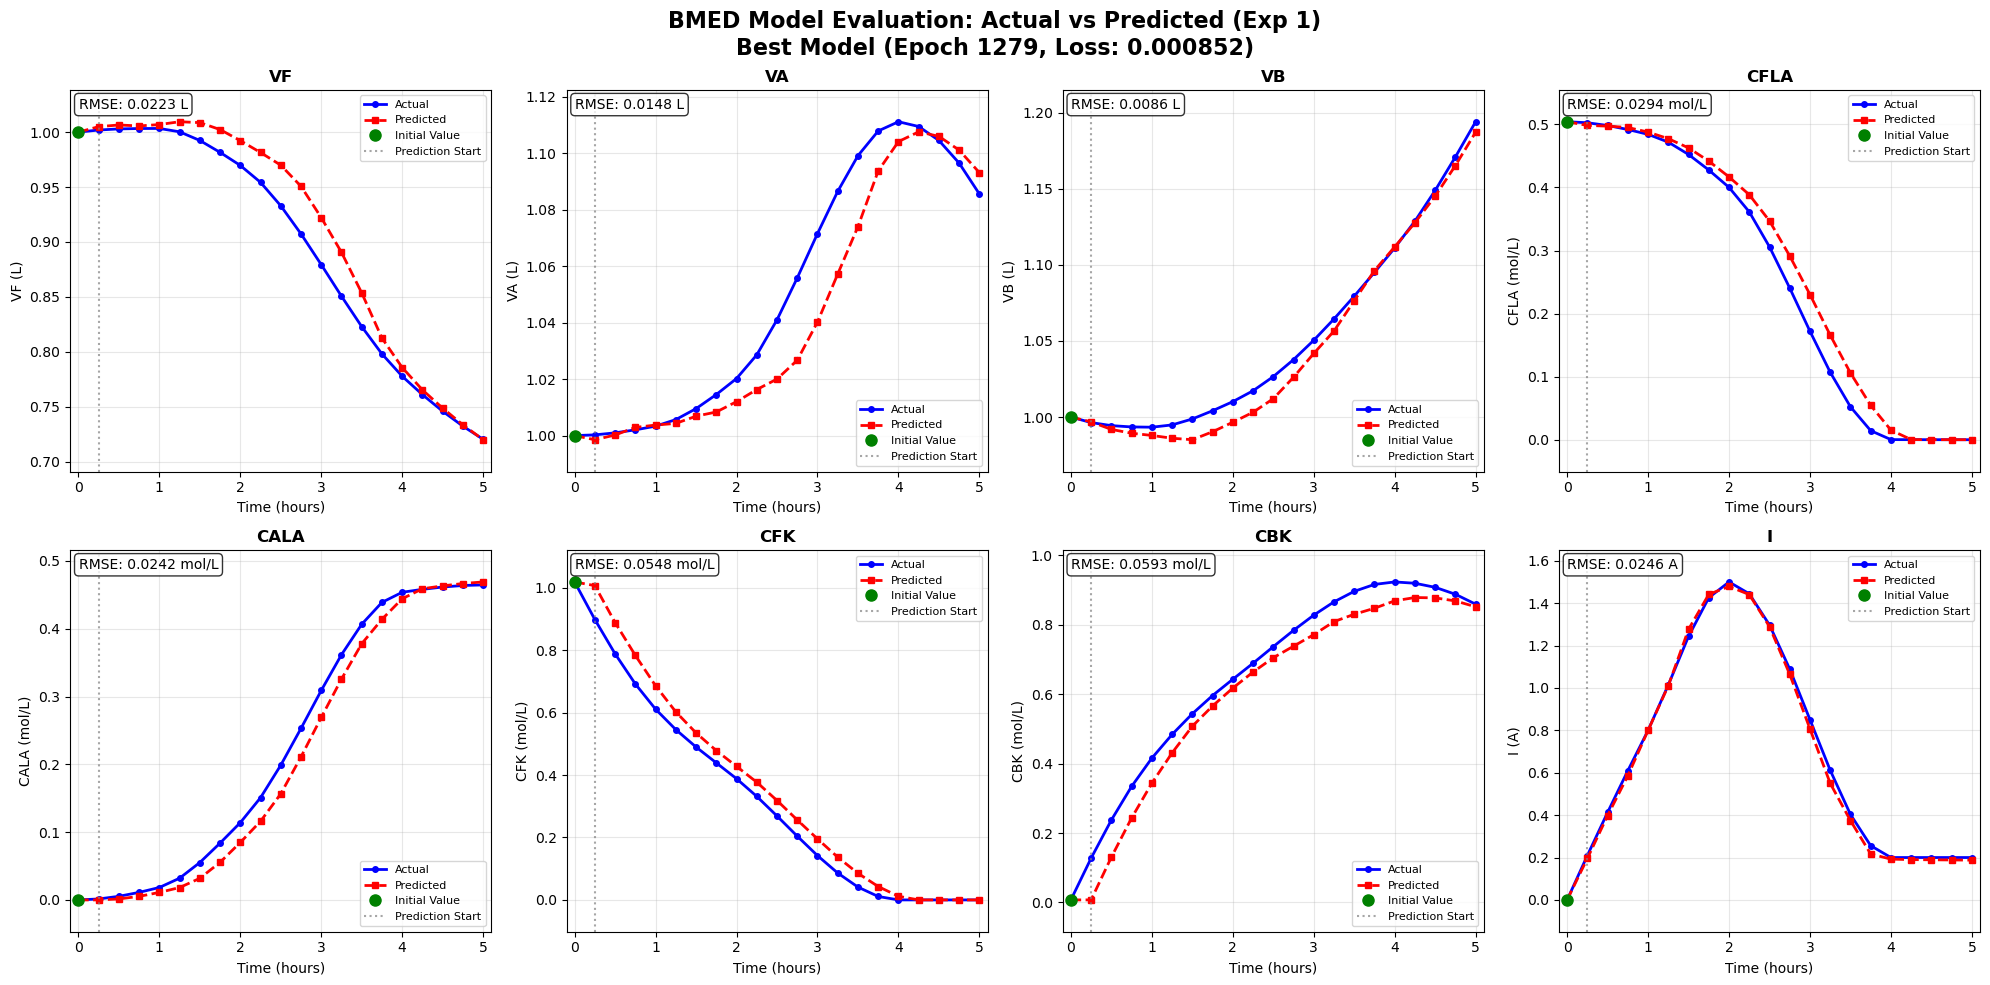

MODEL EVALUATION RESULTS - Experiment 1
Best Model (Epoch 1279, Loss: 0.000852)
Initial time point: t = 0.00 hours
Prediction starts from: t = 0.25 hours
Total sequence length: 21 points
Prediction sequence length: 20 points
--------------------------------------------------------------------------------
VF    : Initial=1.0000 L, RMSE=0.0223 L, MAE=0.0167 L, MAPE=1.86%, R¬≤=0.9531
VA    : Initial=1.0000 L, RMSE=0.0148 L, MAE=0.0103 L, MAPE=0.97%, R¬≤=0.8814
VB    : Initial=1.0000 L, RMSE=0.0086 L, MAE=0.0071 L, MAPE=0.68%, R¬≤=0.9818
CFLA  : Initial=0.5043 mol/L, RMSE=0.0294 mol/L, MAE=0.0202 mol/L, MAPE=444.50%, R¬≤=0.9793
CALA  : Initial=0.0000 mol/L, RMSE=0.0242 mol/L, MAE=0.0190 mol/L, MAPE=25.54%, R¬≤=0.9825
CFK   : Initial=1.0186 mol/L, RMSE=0.0548 mol/L, MAE=0.0448 mol/L, MAPE=602.97%, R¬≤=0.9637
CBK   : Initial=0.0074 mol/L, RMSE=0.0593 mol/L, MAE=0.0519 mol/L, MAPE=13.45%, R¬≤=0.9401
I     : Initial=0.0000 A, RMSE=0.0246 A, MAE=0.0194 A, MAPE=4.33%, R¬≤=0.9973
----------------

In [181]:
# Î™®Îç∏ ÌèâÍ∞Ä: Ïã§Ï†ú vs ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê (denormalized ÏõêÎ≥∏ Îã®ÏúÑ, Best Model ÏÇ¨Ïö©)
import matplotlib.pyplot as plt
import numpy as np

# normalizationÏóê ÏÇ¨Ïö©Îêú range_mm Î≥µÏõê (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
original_df = pd.read_csv('BMED_DATA_AG.csv')
original_df = original_df[original_df['exp'].isin([0, 1])]

range_mm = {
    'V': {'min': original_df['V'].min()*0.8, 'max': original_df['V'].max()*1.2},
    'E': {'min': original_df['E'].min()*0.8, 'max': original_df['E'].max()*1.2},
    'VF': {'min': original_df['VF'].min()*0.8, 'max': original_df['VF'].max()*1.2},
    'VA': {'min': original_df['VA'].min()*0.8, 'max': original_df['VA'].max()*1.2},
    'VB': {'min': original_df['VB'].min()*0.8, 'max': original_df['VB'].max()*1.2},
    'CFLA': {'min': 0, 'max': original_df['CFLA'].max()*1.2},
    'CALA': {'min': 0, 'max': original_df['CALA'].max()*1.2},
    'CFK': {'min': 0, 'max': original_df['CFK'].max()*1.2},
    'CBK': {'min': 0, 'max': original_df['CBK'].max()*1.2},
    'I': {'min': 0, 'max': original_df['I'].max()*1.2},
}

def denormalize_data(normalized_data, feature_name):
    """Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏõêÎûò Îã®ÏúÑÎ°ú Î≥µÏõê"""
    if feature_name in range_mm:
        min_val = range_mm[feature_name]['min']
        max_val = range_mm[feature_name]['max']
        return normalized_data * (max_val - min_val) + min_val
    return normalized_data

# feature Ï†ïÎ≥¥ Ï†ïÏùò
feature_names = ['VF', 'VA', 'VB', 'CFLA', 'CALA', 'CFK', 'CBK', 'I']
feature_indices = [2, 3, 4, 5, 6, 7, 8, 9]
feature_units = ['L', 'L', 'L', 'mol/L', 'mol/L', 'mol/L', 'mol/L', 'A']

# Best model ÌôïÏù∏
if best_model is None:
    print("‚ùå Best modelÏù¥ Ï†ÄÏû•ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. ÌòÑÏû¨ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    evaluation_model = model
    model_info = "Current Model"
else:
    evaluation_model = best_model
    model_info = f"Best Model (Epoch {best_epoch}, Loss: {best_train_loss:.6f})"
    print(f"‚úÖ {model_info} ÏÇ¨Ïö©ÌïòÏó¨ ÌèâÍ∞ÄÎ•º ÏßÑÌñâÌï©ÎãàÎã§.")

# Ïã§Ìóò ÏÑ†ÌÉù ÏòµÏÖò
exp_to_evaluate = 1  # 0 ÎòêÎäî 1Î°ú Î≥ÄÍ≤Ω Í∞ÄÎä•
print(f"üìä ÌèâÍ∞Ä ÎåÄÏÉÅ Ïã§Ìóò: Experiment {exp_to_evaluate}")

# ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïã§Ìóò ÌôïÏù∏
available_exps = []
for i, (input_seq, seq_lengths) in enumerate(dataloader):
    available_exps.append(i)
print(f"üìã ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïã§Ìóò: {available_exps}")

evaluation_model.eval()
with torch.no_grad():
    # ÏÑ†ÌÉùÎêú Ïã§ÌóòÏùò Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    for i, (input_seq, seq_lengths) in enumerate(dataloader):
        if i == exp_to_evaluate:
            selected_input_seq = input_seq.to(device)
            selected_seq_lengths = seq_lengths.to(device)
            break
    else:
        print(f"‚ö†Ô∏è Ïã§Ìóò {exp_to_evaluate}ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ï≤´ Î≤àÏß∏ Ïã§ÌóòÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
        selected_input_seq, selected_seq_lengths = next(iter(dataloader))
        selected_input_seq = selected_input_seq.to(device)
        selected_seq_lengths = selected_seq_lengths.to(device)
        exp_to_evaluate = 0
    
    # Teacher forcing Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    inputs, targets, target_seq_lengths = prepare_teacher_forcing_data(selected_input_seq, selected_seq_lengths)
    
    # Best modelÎ°ú ÏòàÏ∏°
    predictions = evaluation_model(inputs, target_seq_lengths)
    
    # CPUÎ°ú Ïù¥ÎèôÌïòÏó¨ ÏãúÍ∞ÅÌôî Ï§ÄÎπÑ
    predictions = predictions.cpu().numpy()
    targets = targets.cpu().numpy()
    input_seq_cpu = selected_input_seq.cpu().numpy()
    
    # Ï≤´ Î≤àÏß∏ ÏÉòÌîå (batchÏùò Ï≤´ Î≤àÏß∏) ÏÇ¨Ïö©
    pred_sample = predictions[0]
    actual_sample = targets[0]
    initial_sample = input_seq_cpu[0]  # Ï¥àÍ∏∞Í∞í Ìè¨Ìï®Îêú Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§
    seq_len = target_seq_lengths[0].item()
    full_seq_len = selected_seq_lengths[0].item()
    
    # Ïã§Ï†ú ÏãúÌÄÄÏä§ Í∏∏Ïù¥ÎßåÌÅºÎßå ÏÇ¨Ïö©
    pred_sample = pred_sample[:seq_len]
    actual_sample = actual_sample[:seq_len]
    initial_sample = initial_sample[:full_seq_len]

# Ïã§Ìóò Ï°∞Í±¥ Ï†ïÎ≥¥ Ï∂úÎ†•
print(f"üî¨ Ïã§Ìóò Ï°∞Í±¥:")
print(f"   - Ïã§Ìóò Î≤àÌò∏: {exp_to_evaluate}")
print(f"   - Ï†ÑÏïï(V): {denormalize_data(initial_sample[0, 0], 'V'):.1f} V")
print(f"   - Ïô∏Î∂Ä Ï†ÑÌï¥Ïßà ÎÜçÎèÑ(E): {denormalize_data(initial_sample[0, 1], 'E'):.2f} M")
print(f"   - ÏãúÌÄÄÏä§ Í∏∏Ïù¥: {full_seq_len} ÏãúÏ†ê ({full_seq_len*0.25:.2f} ÏãúÍ∞Ñ)")

# ÏãúÍ∞Ñ Ï∂ï ÏÉùÏÑ±
time_points = np.arange(full_seq_len) * 0.25  # Ï†ÑÏ≤¥ ÏãúÍ∞ÑÏ∂ï (0.0Î∂ÄÌÑ∞)

# ÏòàÏ∏°Í∞íÏùÑ Ï¥àÍ∏∞Í∞íÍ≥º Ïó∞Í≤∞ÌïòÏó¨ Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§ Íµ¨ÏÑ±
prediction_full = np.zeros((full_seq_len, 10))
# Ï≤´ Î≤àÏß∏ ÏãúÏ†êÏùÄ Ï¥àÍ∏∞Í∞í ÏÇ¨Ïö©
prediction_full[0] = initial_sample[0]
# ÎÇòÎ®∏ÏßÄ ÏãúÏ†êÏùÄ Î™®Îç∏ ÏòàÏ∏°Í∞í ÏÇ¨Ïö©
prediction_full[1:seq_len+1] = pred_sample

# 2x4 subplot ÏÉùÏÑ±
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle(f'BMED Model Evaluation: Actual vs Predicted (Exp {exp_to_evaluate})\n{model_info}', fontsize=16, fontweight='bold')

for i, (feature_name, feature_idx, unit) in enumerate(zip(feature_names, feature_indices, feature_units)):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    # Îç∞Ïù¥ÌÑ∞Î•º ÏõêÎûò Îã®ÏúÑÎ°ú denormalize
    actual_denorm = denormalize_data(initial_sample[:, feature_idx], feature_name)
    pred_denorm = denormalize_data(prediction_full[:seq_len+1, feature_idx], feature_name)
    
    # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ (Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§)
    ax.plot(time_points, actual_denorm, 'b-', linewidth=2, label='Actual', marker='o', markersize=4)
    
    # ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ (Ï¥àÍ∏∞Í∞íÎ∂ÄÌÑ∞ Ïó∞Í≤∞Îêú Ï†ÑÏ≤¥ ÏãúÌÄÄÏä§)
    ax.plot(time_points[:seq_len+1], pred_denorm, 'r--', linewidth=2, label='Predicted', marker='s', markersize=4)
    
    # Ï¥àÍ∏∞Í∞í Í∞ïÏ°∞ ÌëúÏãú
    ax.plot(time_points[0], actual_denorm[0], 'go', markersize=8, label='Initial Value')
    
    # ÏòàÏ∏° ÏãúÏûëÏ†ê ÌëúÏãú
    ax.axvline(x=time_points[1], color='gray', linestyle=':', alpha=0.7, label='Prediction Start')
    
    # Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
    ax.set_title(f'{feature_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time (hours)', fontsize=10)
    ax.set_ylabel(f'{feature_name} ({unit})', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    
    # RMSE Í≥ÑÏÇ∞ Î∞è ÌëúÏãú (denormalized Í∞íÏúºÎ°ú, ÏòàÏ∏° Íµ¨Í∞ÑÎßå)
    actual_pred_denorm = denormalize_data(actual_sample[:, feature_idx], feature_name)
    pred_pred_denorm = denormalize_data(pred_sample[:, feature_idx], feature_name)
    rmse = np.sqrt(np.mean((actual_pred_denorm - pred_pred_denorm)**2))
    ax.text(0.02, 0.98, f'RMSE: {rmse:.4f} {unit}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í≥†Î†§)
    all_values = np.concatenate([actual_denorm, pred_denorm])
    y_min = all_values.min()
    y_max = all_values.max()
    y_range = y_max - y_min
    if y_range > 0:
        ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
    
    # xÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    ax.set_xlim(-0.1, time_points[seq_len] + 0.1)

plt.tight_layout()
plt.show()

# Ï†ÑÏ≤¥ ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞ (denormalized)
print("="*80)
print(f"MODEL EVALUATION RESULTS - Experiment {exp_to_evaluate}")
print(f"{model_info}")
print("="*80)
print(f"Initial time point: t = {time_points[0]:.2f} hours")
print(f"Prediction starts from: t = {time_points[1]:.2f} hours")
print(f"Total sequence length: {full_seq_len} points")
print(f"Prediction sequence length: {seq_len} points")
print("-"*80)

total_rmse = 0
for i, (feature_name, unit) in enumerate(zip(feature_names, feature_units)):
    feature_idx = feature_indices[i]
    
    # denormalized Í∞íÏúºÎ°ú ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    actual_vals_denorm = denormalize_data(actual_sample[:, feature_idx], feature_name)
    pred_vals_denorm = denormalize_data(pred_sample[:, feature_idx], feature_name)
    initial_val_denorm = denormalize_data(initial_sample[0, feature_idx], feature_name)
    
    # ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    rmse = np.sqrt(np.mean((actual_vals_denorm - pred_vals_denorm)**2))
    mae = np.mean(np.abs(actual_vals_denorm - pred_vals_denorm))
    mape = np.mean(np.abs((actual_vals_denorm - pred_vals_denorm) / (actual_vals_denorm + 1e-8))) * 100  # MAPE (%)
    r2 = 1 - (np.sum((actual_vals_denorm - pred_vals_denorm)**2) / np.sum((actual_vals_denorm - np.mean(actual_vals_denorm))**2))
    
    print(f"{feature_name:6s}: Initial={initial_val_denorm:.4f} {unit}, RMSE={rmse:.4f} {unit}, MAE={mae:.4f} {unit}, MAPE={mape:.2f}%, R¬≤={r2:.4f}")
    total_rmse += rmse

avg_rmse = total_rmse / len(feature_names)
print("-"*80)
print(f"AVERAGE: RMSE={avg_rmse:.4f} (mixed units)")
if best_model is not None:
    print(f"‚úÖ Best training loss: {best_train_loss:.6f} (Epoch {best_epoch})")
print("="*80)

# Ïã§Ìóò Î≥ÄÍ≤Ω Î∞©Î≤ï ÏïàÎÇ¥
print(f"\nüí° Ïã§Ìóò Î≥ÄÍ≤ΩÌïòÎ†§Î©¥:")
print(f"   - ÏΩîÎìúÏùò 'exp_to_evaluate = 0' Î∂ÄÎ∂ÑÏùÑ ÏàòÏ†ïÌïòÏÑ∏Ïöî")
print(f"   - ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïã§Ìóò: {available_exps}")
print(f"   - ÌòÑÏû¨ ÏÑ§Ï†ï: Experiment {exp_to_evaluate}")